## 5.0 Data Visualization 

In [4]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pd.read_csv('reviews.csv',parse_dates=['Timestamp'])

In [2]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


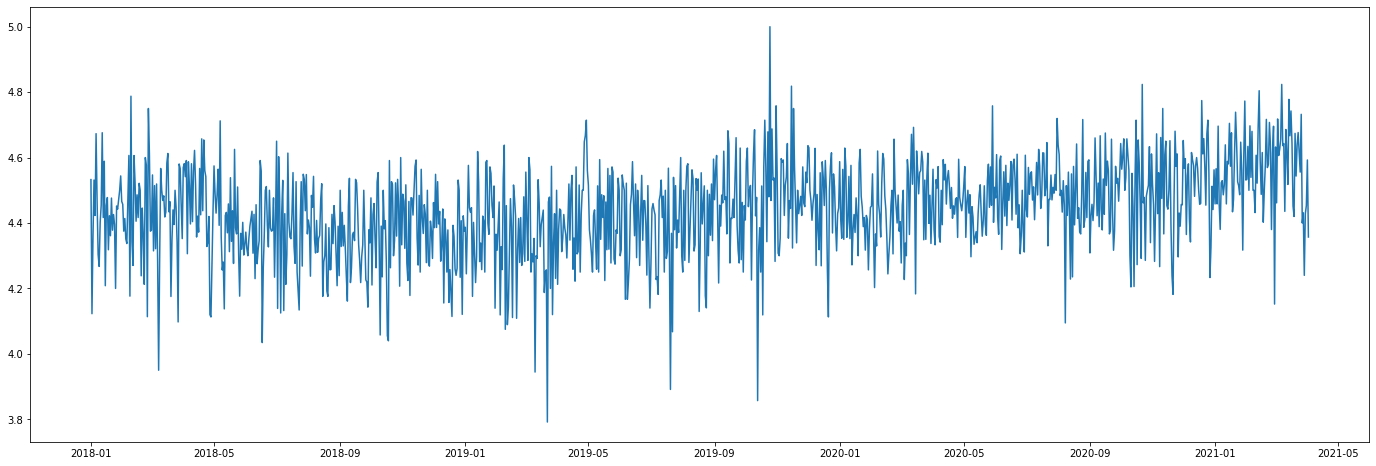

In [3]:
# Ratings Average By Day
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

plt.figure(figsize=(24,8))
plt.plot(day_average.index,day_average['Rating'])

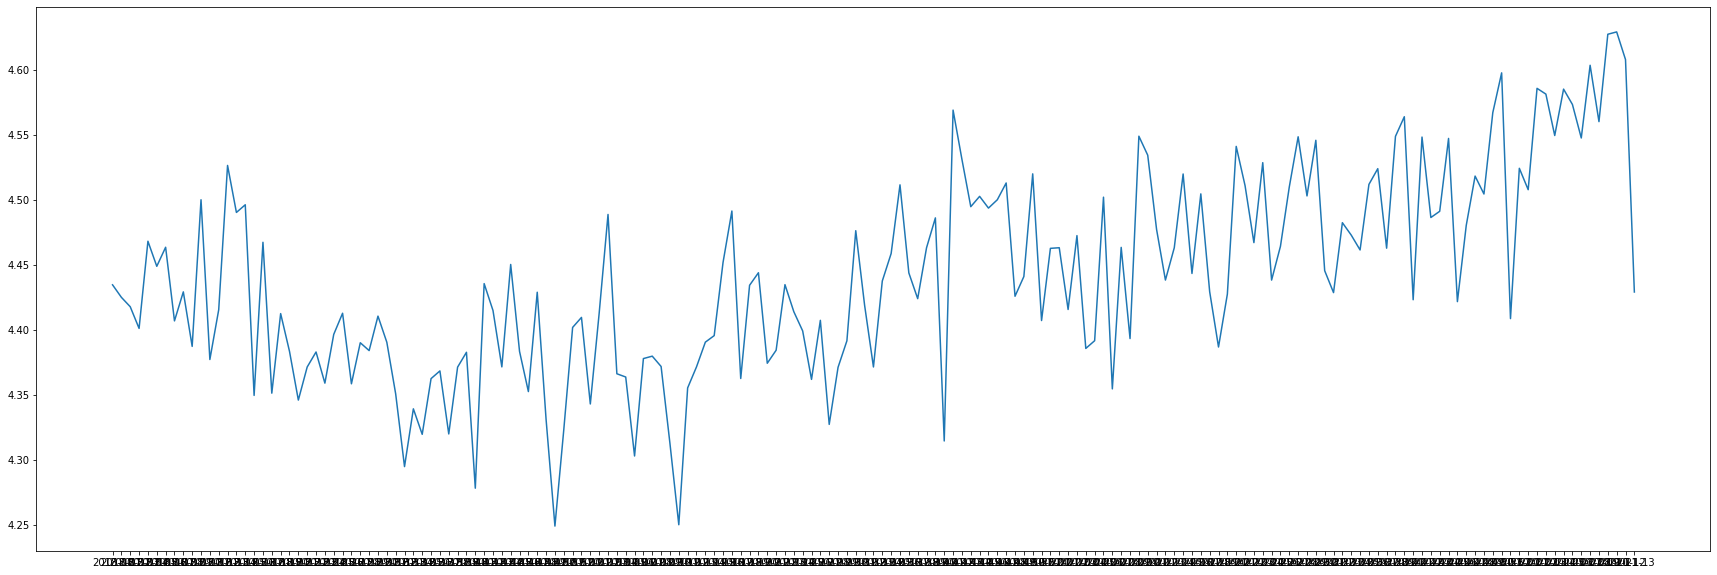

In [4]:
# Ratings Average By Week
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average

plt.figure(figsize=(30,10))
plt.plot(week_average.index,week_average['Rating'])

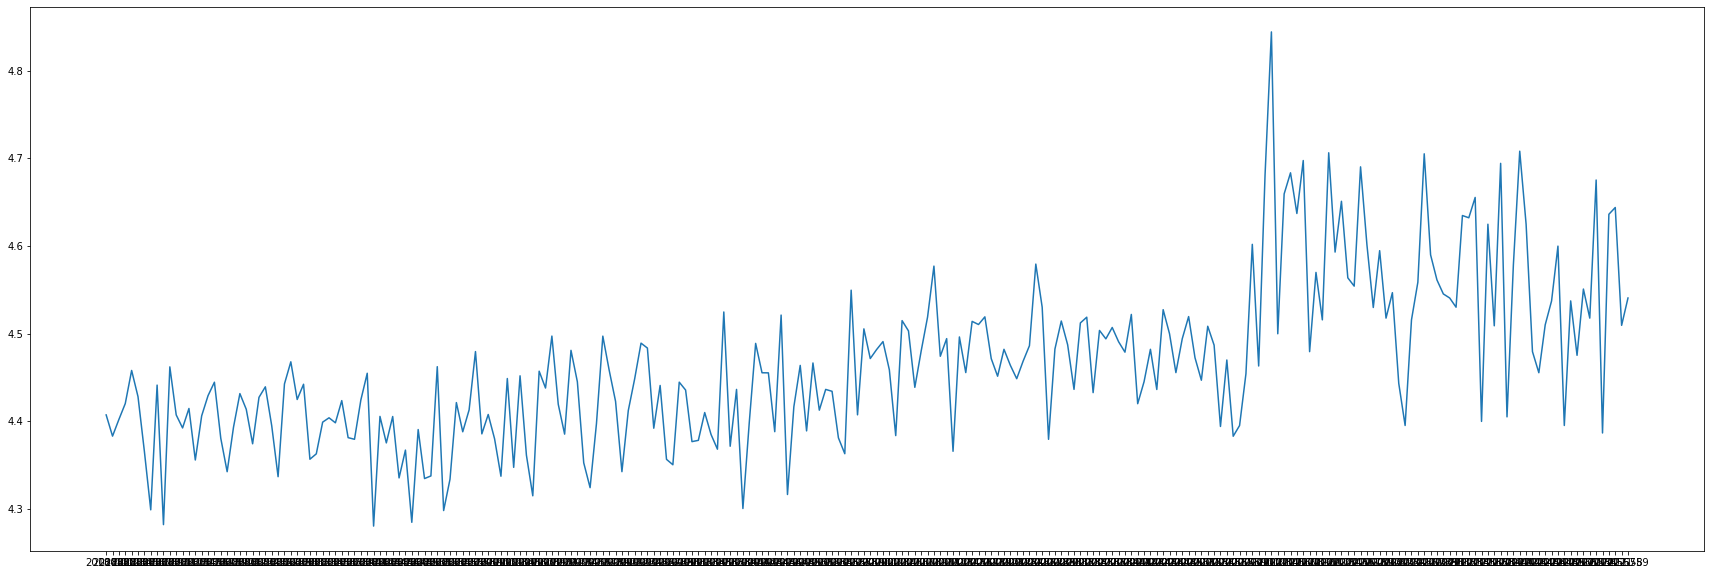

In [5]:
# Ratings Average By Month
data['Month'] = data['Timestamp'].dt.strftime('%Y-%M')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(30,10))
plt.plot(month_average.index,month_average['Rating'])

In [37]:
# Downsampling has increased readabilitty
# Ratings are steadily increasing over time.

## 5.1 Further Visualization

In [7]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%M')
month_average_crn = data.groupby(['Month','Course Name'])['Rating'].count().unstack()
month_average_crn[-10:]

#month_average_crn.plot(figsize=(24,8))

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2021-50,NaN,2.0,1.0,NaN,NaN,2.0,6.0,29.0
2021-51,3.0,NaN,NaN,NaN,NaN,2.0,11.0,45.0
2021-52,2.0,NaN,NaN,1.0,NaN,1.0,7.0,38.0
2021-53,NaN,NaN,NaN,NaN,NaN,1.0,12.0,43.0
2021-54,1.0,1.0,NaN,2.0,1.0,1.0,7.0,44.0
2021-55,4.0,1.0,1.0,1.0,NaN,2.0,5.0,39.0
2021-56,1.0,1.0,1.0,1.0,NaN,NaN,16.0,35.0
2021-57,1.0,2.0,1.0,NaN,NaN,2.0,9.0,44.0
2021-58,NaN,NaN,3.0,2.0,NaN,5.0,9.0,33.0


## 6.0 Conclusions

#### What day are people the happiest, judging from ratings.

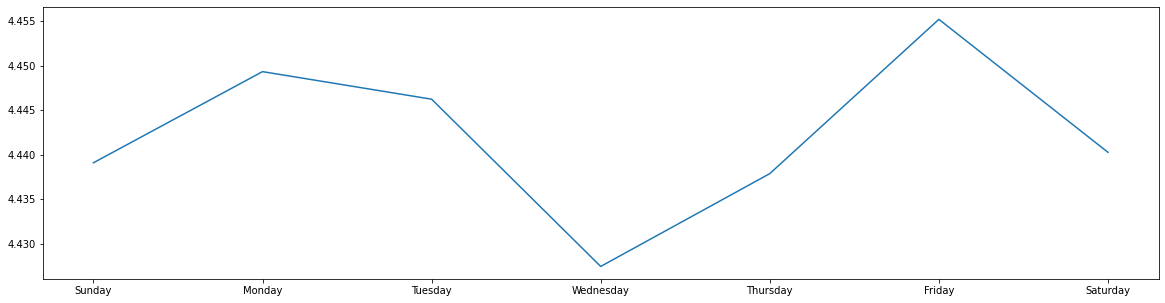

In [10]:
data['Weekday']=data['Timestamp'].dt.strftime('%A')
data['DayNumber'] = data['Timestamp'].dt.strftime('%w')


weekday_average = data.groupby(['Weekday', 'DayNumber']).mean()
weekday_average = weekday_average.sort_values('DayNumber')

plt.figure(figsize=(20,5))
plt.plot(weekday_average.index.get_level_values(0),weekday_average['Rating'])


In [ ]:
# Friday People tend to be the happiest (Higher Ratings)
# Wednesday people tend to be the least happiest (lowest Ratings)

In [9]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc

In [23]:
share = data.groupby(['Course Name'])['Rating'].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x2269560cfd0>,
 [Text(0.34794672744005006, 1.0435195613230064, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(-1.0025240789969658, 0.45270903572966803, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(-0.9777669059252289, -0.5039562259536089, 'Data Processing with Python'),
  Text(0.20449263642694634, -1.0808250374816253, 'Interactive Data Visualization with Python and Bokeh'),
  Text(1.0168851909466585, -0.4194573976381605, 'Learn GIS in One Hour')])

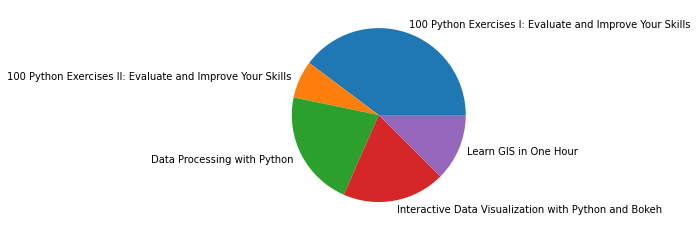

In [22]:
plt.pie(share[0:5], labels=share.index[0:5])